# Analysis notebook for mapping evaluation

Assumes results generated - see Makefile for details

In [1]:
task = "fbbt-zfa"
#task = "fbbt-wbbt"
#task = "hsapdv-mmusdv"

In [2]:
# Parameters
task = "combined"


In [3]:
import pandas as pd

In [4]:
%run md_utils.py

## Utility SSSOM loading methods

In [5]:
def task_method_sssom_path(method: str):
    if method == "curated":
        dir = "data"
    else:
        dir = "results"
    return f"../{dir}/{method}-{task}.sssom.tsv"

In [6]:
def load_sssom(method):
    path = task_method_sssom_path(method)
    df = pd.read_csv(path, sep="\t", comment="#")
    df["mapping_source"]  = method
    if method == "lexmatch":
        df[["predicate_id"]] = "skos:exactMatch"
    return df.drop_duplicates()

lexmatch = load_sssom("lexmatch")
lexmatch

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,NCIT:C13413,Whole Organism,semapv:LexicalMatching,oaklib,0.5,oio:hasRelatedSynonym,oio:hasExactSynonym,whole organism,lexmatch
1,FBbt:00000001,organism,skos:exactMatch,NCIT:C13413,Whole Organism,semapv:LexicalMatching,oaklib,0.5,oio:hasRelatedSynonym,rdfs:label,whole organism,lexmatch
2,FBbt:00000001,organism,skos:exactMatch,NCIT:C14202,Drosophila,semapv:LexicalMatching,oaklib,0.5,oio:hasRelatedSynonym,oio:hasExactSynonym,drosophila,lexmatch
3,FBbt:00000001,organism,skos:exactMatch,NCIT:C14202,Drosophila,semapv:LexicalMatching,oaklib,0.5,oio:hasRelatedSynonym,rdfs:label,drosophila,lexmatch
4,FBbt:00000001,organism,skos:exactMatch,NCIT:C14250,Organism,semapv:LexicalMatching,oaklib,0.5,rdfs:label,oio:hasExactSynonym,organism,lexmatch
...,...,...,...,...,...,...,...,...,...,...,...,...
200309,NCIT:C9925,Cyclophosphamide/Doxorubicin/Tamoxifen,skos:exactMatch,FBbt:00100099,adult antennal lobe tract,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,act,lexmatch
200310,NCIT:C99624,CCHCR1 wt Allele,skos:exactMatch,FBbt:00110354,larval dopaminergic SL neuron,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasBroadSynonym,sbp,lexmatch
200311,NCIT:C99661,DLK1 wt Allele,skos:exactMatch,FBbt:00001329,intermediate peripheral glial cell of ISN,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,pg2,lexmatch
200312,NCIT:C99662,Protein Delta Homolog 1,skos:exactMatch,FBbt:00001329,intermediate peripheral glial cell of ISN,semapv:LexicalMatching,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,pg2,lexmatch


In [7]:
lexmatch.groupby(["subject_match_field", "object_match_field"]).count()

subject_id  subject_label   
subject_match_field   object_match_field                                     
oio:hasBroadSynonym   oio:hasExactSynonym              1323           1323  \
                      oio:hasRelatedSynonym               8              8   
                      rdfs:label                        257            257   
oio:hasDbXref         oio:hasDbXref                      73             73   
                      oio:hasDbXref-INVERSE               2              2   
                      rdf:ID                            160            160   
oio:hasExactSynonym   oio:hasBroadSynonym               285            285   
                      oio:hasExactSynonym             28655          28655   
                      oio:hasNarrowSynonym               50             50   
                      oio:hasRelatedSynonym             700            700   
                      rdfs:label                       5986           5986   
oio:hasNarrowSynonym  oio:hasExactSynonym               384            384   
                      oio:hasNarrowSynonym                1              1   
                      rdfs:label                        107            107   
oio:hasRelatedSynonym oio:hasExactSynonym              4991           4991   
                      oio:hasRelatedSynonym              14             14   
                      rdfs:label                        902            902   
rdf:ID                oio:hasDbXref-INVERSE            7023           7023   
                      skos:broadMatch-INVERSE             1              1   
                      skos:exactMatch-INVERSE          6872           6872   
                      skos:relatedMatch-INVERSE          32             32   
rdfs:label            oio:hasBroadSynonym                 6              6   
                      oio:hasExactSynonym              6860           6860   
                      oio:hasNarrowSynonym                3              3   
                      oio:hasRelatedSynonym              61             61   
                      rdfs:label                       5138           5138   
skos:exactMatch       rdf:ID                            159            159   

                                                 predicate_id  object_id   
subject_match_field   object_match_field                                   
oio:hasBroadSynonym   oio:hasExactSynonym                1323       1323  \
                      oio:hasRelatedSynonym                 8          8   
                      rdfs:label                          257        257   
oio:hasDbXref         oio:hasDbXref                        73         73   
                      oio:hasDbXref-INVERSE                 2          2   
                      rdf:ID                              160        160   
oio:hasExactSynonym   oio:hasBroadSynonym                 285        285   
                      oio:hasExactSynonym               28655      28655   
                      oio:hasNarrowSynonym                 50         50   
                      oio:hasRelatedSynonym               700        700   
                      rdfs:label                         5986       5986   
oio:hasNarrowSynonym  oio:hasExactSynonym                 384        384   
                      oio:hasNarrowSynonym                  1          1   
                      rdfs:label                          107        107   
oio:hasRelatedSynonym oio:hasExactSynonym                4991       4991   
                      oio:hasRelatedSynonym                14         14   
                      rdfs:label                          902        902   
rdf:ID                oio:hasDbXref-INVERSE              7023       7023   
                      skos:broadMatch-INVERSE               1          1   
                      skos:exactMatch-INVERSE            6872       6872   
                      skos:relatedMatch-INVERSE            32         32   
rdfs:label            oio:hasBroadSyno

In [8]:
curated = load_sssom("curated")
curated

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000468,curated
4,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000468,curated
20,FBbt:00000004,head,skos:exactMatch,WBbt:0005739,head,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,uberon:0000033,curated
24,FBbt:00000004,head,skos:exactMatch,WBbt:0005739,head,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref-INVERSE,oio:hasDbXref-INVERSE,uberon:0000033,curated
40,FBbt:00000124,epithelial cell,skos:exactMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,oaklib,0.941176,oio:hasDbXref,oio:hasDbXref-INVERSE,cl:0000066,curated
...,...,...,...,...,...,...,...,...,...,...,...,...
2072,MONDO:0018492,hereditary clear cell renal cell carcinoma,skos:exactMatch,NCIT:C36260,Hereditary Clear Cell Renal Cell Carcinoma,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0018492,curated
2077,MONDO:0019005,nephronophthisis,skos:exactMatch,NCIT:C123200,Nephronophthisis,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0019005,curated
2085,MONDO:0020642,polycystic kidney disease,skos:exactMatch,NCIT:C75464,Polycystic Kidney Disease,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0020642,curated
2090,MONDO:0020726,"tubulointerstitial kidney disease, autosomal d...",skos:exactMatch,NCIT:C123171,Medullary Cystic Kidney Disease Type I,semapv:LexicalMatching,oaklib,0.941176,rdf:ID,oio:hasDbXref-INVERSE,mondo:0020726,curated


In [9]:
gpt3 = load_sssom("gpt3")
gpt3

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:narrowMatch,WBbt:0007833,organism,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,organism,gpt3
1,FBbt:00000004,head,skos:relatedMatch,WBbt:0005739,head,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,head,gpt3
2,FBbt:00000034,egg,skos:narrowMatch,WBbt:0006797,oocyte,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,oio:hasRelatedSynonym,ovum,gpt3
3,FBbt:00000092,primordial germ cell,skos:narrowMatch,WBbt:0006849,germline precursor cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,primordial germ cell,gpt3
4,FBbt:00000124,epithelial cell,skos:broadMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,epithelial cell,gpt3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,NCIT:C4003,Stage IV Renal Cell Cancer AJCC v6,skos:narrowMatch,NCIT:C89303,Stage IV Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage iv renal cell cancer,gpt3
700,NCIT:C6568,Childhood Renal Cell Carcinoma,skos:narrowMatch,NCIT:C9385,Renal Cell Carcinoma,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,renal cell cancer,gpt3
701,NCIT:C7824,Stage II Renal Cell Cancer AJCC v6,skos:exactMatch,NCIT:C89301,Stage II Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage ii renal cell cancer,gpt3
702,NCIT:C80078,Chronic Kidney Disease,skos:narrowMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,chronic renal disease,gpt3


In [10]:
gpt4 = load_sssom("gpt4")
gpt4

,subject_id,subject_label,predicate_id,object_id,object_label,mapping_justification,subject_source,object_source,mapping_tool,confidence,subject_match_field,object_match_field,match_string,mapping_source
0,FBbt:00000001,organism,skos:exactMatch,WBbt:0007833,organism,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,organism,gpt4
1,FBbt:00000004,head,skos:relatedMatch,WBbt:0005739,head,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,head,gpt4
2,FBbt:00000034,egg,skos:narrowMatch,WBbt:0006797,oocyte,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,oio:hasExactSynonym,oio:hasRelatedSynonym,ovum,gpt4
3,FBbt:00000092,primordial germ cell,skos:relatedMatch,WBbt:0006849,germline precursor cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,oio:hasRelatedSynonym,primordial germ cell,gpt4
4,FBbt:00000124,epithelial cell,skos:exactMatch,WBbt:0003672,epithelial cell,semapv:LexicalMatching,FBbt,WBbt,oaklib,0.5,rdfs:label,rdfs:label,epithelial cell,gpt4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,NCIT:C4003,Stage IV Renal Cell Cancer AJCC v6,skos:relatedMatch,NCIT:C89303,Stage IV Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage iv renal cell cancer,gpt4
700,NCIT:C6568,Childhood Renal Cell Carcinoma,skos:narrowMatch,NCIT:C9385,Renal Cell Carcinoma,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,renal cell cancer,gpt4
701,NCIT:C7824,Stage II Renal Cell Cancer AJCC v6,skos:relatedMatch,NCIT:C89301,Stage II Renal Cell Cancer AJCC v7,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,stage ii renal cell cancer,gpt4
702,NCIT:C80078,Chronic Kidney Disease,skos:exactMatch,NCIT:C9438,Chronic Renal Failure,semapv:LexicalMatching,NCIT,NCIT,oaklib,0.5,oio:hasExactSynonym,oio:hasExactSynonym,chronic renal disease,gpt4


In [11]:
pd.concat([gpt3, gpt4]).groupby(["mapping_source", "predicate_id"]).count()

subject_id  subject_label  object_id   
mapping_source predicate_id                                              
gpt3           owl:differentFrom         216            216        216  \
               skos:broadMatch            88             88         88   
               skos:exactMatch           138            138        138   
               skos:narrowMatch          163            163        163   
               skos:relatedMatch          98             98         98   
gpt4           owl:differentFrom         252            252        252   
               skos:broadMatch             4              4          4   
               skos:exactMatch           241            241        241   
               skos:narrowMatch           44             44         44   
               skos:relatedMatch         162            162        162   

                                  object_label  mapping_justification   
mapping_source predicate_id                                             
gpt3           owl:differentFrom           216                    216  \
               skos:broadMatch              88                     88   
               skos:exactMatch             138                    138   
               skos:narrowMatch            163                    163   
               skos:relatedMatch            98                     98   
gpt4           owl:differentFrom           252                    252   
               skos:broadMatch               4                      4   
               skos:exactMatch             241                    241   
               skos:narrowMatch             44                     44   
               skos:relatedMatch           162                    162   

                                  subject_source  object_source  mapping_tool   
mapping_source predicate_id                                                     
gpt3           owl:differentFrom             216            216           216  \
               skos:broadMatch                88             88            88   
               skos:exactMatch               138            138           138   
               skos:narrowMatch              163            163           163   
               skos:relatedMatch              98             98            98   
gpt4           owl:differentFrom             252            252           252   
               skos:broadMatch                 4              4             4   
               skos:exactMatch               241            241           241   
               skos:narrowMatch               44             44            44   
               skos:relatedMatch             162            162           162   

                                  confidence  subject_match_field   
mapping_source predicate_id                                         
gpt3           owl:differentFrom         216                  216  \
               skos:broadMatch            88                   88   
               skos:exactMatch           138                  138   
               skos:narrowMatch          163                  163   
               skos:relatedMatch          98                   98   
gpt4           owl:differentFrom         252                  252   
               skos:broadMatch             4                    4   
               skos:exactMatch           241                  241   
               skos:narrowMatch           44                   44   
               skos:relatedMatch         162                  162   

                                  object_match_field  match_string  
mapping_source predicate_id                                         
gpt3           owl:differentFrom                 216           216  
               skos:broadMatch                    88            88  
               skos:exactMatch                   138           138  
               skos:narrowMatch                  163           163  
               skos:relatedMatch                  98

In [12]:
logmap = load_sssom("logmap")
logmap

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
0,FBbt:00005173,WBbt:0005762,0.51,skos:exactMatch,thecogen cell,accessory cell,logmap
1,FBbt:00005171,WBbt:0008418,0.78,skos:exactMatch,tormogen cell,IL socket cell,logmap
2,FBbt:00005171,WBbt:0005750,0.54,skos:exactMatch,tormogen cell,socket cell,logmap
3,FBbt:00003372,WBbt:0003675,0.52,skos:exactMatch,tergosternal muscle cell,muscle cell,logmap
4,FBbt:00004924,WBbt:0006760,0.75,skos:exactMatch,uterus,uterus,logmap
...,...,...,...,...,...,...,...
366,MONDO:0011165,NCIT:C187984,0.69,skos:exactMatch,glomerulopathy with fibronectin deposits 2,Glomerulopathy with Fibronectin Deposits-2,logmap
367,MONDO:0019006,NCIT:C122796,0.87,skos:exactMatch,familial idiopathic steroid-resistant nephroti...,Idiopathic Nephrotic Syndrome,logmap
368,MONDO:0020726,NCIT:C123171,0.68,skos:exactMatch,"tubulointerstitial kidney disease, autosomal d...",Medullary Cystic Kidney Disease Type I,logmap
369,MONDO:0020726,NCIT:C123167,0.64,skos:exactMatch,"tubulointerstitial kidney disease, autosomal d...",Autosomal Dominant Polycystic Kidney Disease T...,logmap


In [13]:
def filter_logmap(df, thresh: float):
    return df.query(f"confidence > {thresh}")
filter_logmap(logmap, 0.8)

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
7,FBbt:00007152,WBbt:0006929,0.87,skos:exactMatch,sensillum,sensillum,logmap
8,FBbt:00004826,WBbt:0008422,0.89,skos:exactMatch,genitalia,sex organ,logmap
11,FBbt:00004856,WBbt:0005746,0.84,skos:exactMatch,organ system,Organ system,logmap
15,FBbt:00004936,WBbt:0006799,0.90,skos:exactMatch,spermatocyte,spermatocyte,logmap
19,FBbt:00005286,WBbt:0008591,0.88,skos:exactMatch,primary spermatocyte,primary spermatocyte,logmap
...,...,...,...,...,...,...,...
360,MONDO:0007671,NCIT:C187984,0.94,skos:exactMatch,fibronectin glomerulopathy,Glomerulopathy with Fibronectin Deposits-2,logmap
361,MONDO:0002350,NCIT:C35337,1.04,skos:exactMatch,familial nephrotic syndrome,Congenital Nephrotic Syndrome,logmap
362,MONDO:0008263,NCIT:C123167,0.85,skos:exactMatch,polycystic kidney disease 1,Autosomal Dominant Polycystic Kidney Disease T...,logmap
363,MONDO:0009889,NCIT:C84579,1.08,skos:exactMatch,autosomal recessive polycystic kidney disease,Autosomal Recessive Polycystic Kidney Disease,logmap


In [14]:
def evaluate(results, gold):
    # filtered = results.query("predicate_id != 'owl:differentFrom'")
    filtered = results.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "object_id"]
    results_set = set([tuple(x) for x in filtered[cols].values])
    gold_set = set([tuple(x) for x in gold[cols].values])

    # Calculate TP, FP, FN
    TP = len(results_set.intersection(gold_set))
    FP = len(results_set.difference(gold_set))
    FN = len(gold_set.difference(results_set))

    # Calculate precision and recall
    precision = TP / (TP + FP) if (TP + FP) != 0 else 0
    recall = TP / (TP + FN) if (TP + FN) != 0 else 0

    # Calculate F1 score
    F1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
    return F1, precision, recall

evaluate(gpt3, curated)

(0.4728682170542636, 0.5980392156862745, 0.391025641025641)

In [15]:
pairs = [(conf, evaluate(filter_logmap(logmap, conf), curated)[0]) for conf in sorted(set(pd.unique(logmap['confidence'])))]
pairs = sorted(pairs, key=lambda x: -x[1])
pairs[0:5]

[(0.73, 0.5376344086021506),
 (0.74, 0.5344352617079889),
 (0.72, 0.5329815303430079),
 (0.71, 0.5260416666666666),
 (0.75, 0.52)]

In [16]:
logmap_best = filter_logmap(logmap, pairs[0][0])
logmap_best

,subject_id,object_id,confidence,predicate_id,subject_label,object_label,mapping_source
1,FBbt:00005171,WBbt:0008418,0.78,skos:exactMatch,tormogen cell,IL socket cell,logmap
4,FBbt:00004924,WBbt:0006760,0.75,skos:exactMatch,uterus,uterus,logmap
5,FBbt:00004921,WBbt:0005319,0.75,skos:exactMatch,spermatheca,spermatheca,logmap
7,FBbt:00007152,WBbt:0006929,0.87,skos:exactMatch,sensillum,sensillum,logmap
8,FBbt:00004826,WBbt:0008422,0.89,skos:exactMatch,genitalia,sex organ,logmap
...,...,...,...,...,...,...,...
361,MONDO:0002350,NCIT:C35337,1.04,skos:exactMatch,familial nephrotic syndrome,Congenital Nephrotic Syndrome,logmap
362,MONDO:0008263,NCIT:C123167,0.85,skos:exactMatch,polycystic kidney disease 1,Autosomal Dominant Polycystic Kidney Disease T...,logmap
363,MONDO:0009889,NCIT:C84579,1.08,skos:exactMatch,autosomal recessive polycystic kidney disease,Autosomal Recessive Polycystic Kidney Disease,logmap
367,MONDO:0019006,NCIT:C122796,0.87,skos:exactMatch,familial idiopathic steroid-resistant nephroti...,Idiopathic Nephrotic Syndrome,logmap


In [17]:
def mk_results(dfs):
    combined = pd.concat(dfs)
    objs = []
    for df in dfs:
        methods = set(pd.unique(df["mapping_source"]))
        assert len(methods) == 1
        method = list(methods)[0]
        f1, p, r = evaluate(df, curated)
        objs.append({"method": method, "f1": f1, "P": p, "R": r})
    return pd.DataFrame(objs)
    
  

summary = mk_results([lexmatch, logmap_best, gpt3, gpt4])
#summary.to_markdown(f"main-results-{task}.md")
as_md_table(summary, f"table-main-results-{task}.md")
summary.style.highlight_max(props='font-weight:bold').format(precision=3)

,method,f1,P,R
0,lexmatch,0.012,0.006,0.865
1,logmap,0.538,0.463,0.641
2,gpt3,0.473,0.598,0.391
3,gpt4,0.647,0.594,0.712


In [18]:
import matplotlib.pyplot as plt

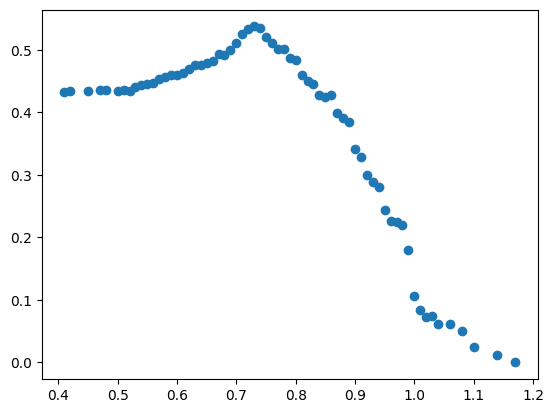

In [19]:
x, y = zip(*pairs)

# Create a scatter plot
plt.scatter(x, y)

# Show the plot
plt.show()

In [20]:
import seaborn as sns

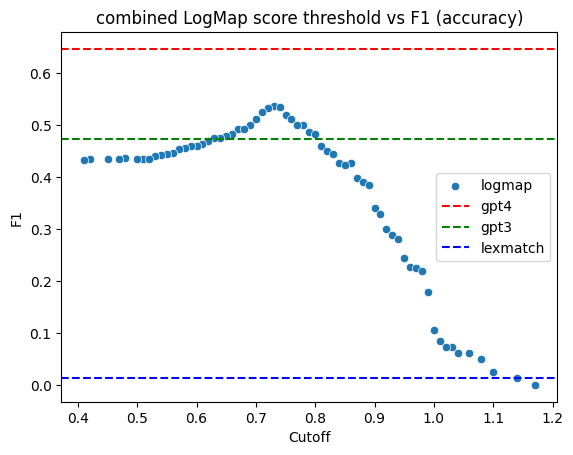

In [21]:
df = pd.DataFrame(pairs, columns=['Cutoff', 'F1'])

# Create a scatter plot
sns.scatterplot(data=df, x='Cutoff', y='F1', label="logmap")

lines = [(gpt4, "gpt4", "red"), (gpt3, "gpt3", "green"), (lexmatch, "lexmatch", "blue")]

for r, label, color in lines:
    plt.axhline(evaluate(r, curated)[0], color=color, linestyle='--', label=label)

plt.legend()

# Adding labels
plt.xlabel('Cutoff')
plt.ylabel('F1')
plt.title(f'{task} LogMap score threshold vs F1 (accuracy)')

plt.savefig(f"../content/images/logmap-scatter-plot-{task}.pdf", format='pdf')

# Show the plot
plt.show()

In [22]:
import plotly

In [23]:
import plotly.io as pio
pio.renderers.default='notebook'

In [24]:
plt.savefig(f"logmap-scatter-plot-{task}.pdf", format='pdf')

<Figure size 640x480 with 0 Axes>

In [25]:
plt.savefig(f"logmap-scatter-plot-{task}.png", format='png')

<Figure size 640x480 with 0 Axes>

In [26]:
def diffs(x, y):
    x2 = x.query("predicate_id == 'skos:exactMatch'")
    y2 = y.query("predicate_id == 'skos:exactMatch'")
    cols = ["subject_id", "subject_label", "object_id", "object_label"]
    xset = set([tuple(v) for v in x2[cols].values])
    yset = set([tuple(v) for v in y2[cols].values])
    return xset-yset

diffs(logmap_best, gpt4)

{('FBbt:00000001', 'organism', 'ZFA:0001094', 'whole organism'),
 ('FBbt:00000004', 'head', 'WBbt:0005739', 'head'),
 ('FBbt:00000035', 'yolk', 'ZFA:0000084', 'yolk'),
 ('FBbt:00000440', 'proctodeum', 'WBbt:0006795', 'proctodeum'),
 ('FBbt:00001000', 'gut suspension muscle cell', 'WBbt:0008599', 'G cell'),
 ('FBbt:00001040',
  'embryonic/larval alary muscle cell',
  'ZFA:0001675',
  'ligament'),
 ('FBbt:00001061', 'ventral neurectoderm', 'ZFA:0001120', 'neuroectoderm'),
 ('FBbt:00001102',
  'larval ventral nerve cord',
  'WBbt:0005829',
  'ventral nerve cord'),
 ('FBbt:00001408', 'neuroblast X', 'WBbt:0008594', 'neuroblast'),
 ('FBbt:00001408', 'neuroblast X', 'ZFA:0009011', 'neuroblast'),
 ('FBbt:00001454', 'RP2sib neuron', 'WBbt:0005359', 'SIB'),
 ('FBbt:00001573', 'EN neuron', 'ZFA:0009248', 'neuron'),
 ('FBbt:00001590', 'V neuron', 'WBbt:0008597', 'V cell'),
 ('FBbt:00001685', 'embryonic/larval plasmatocyte', 'ZFA:0009285', 'podocyte'),
 ('FBbt:00002597',
  'larval abdominal median